# 关于优化算法
> 用典型问题分析不同优化算法的性能

In [1]:
import sys
print('Hello, Colaboratory from Python {}!'.format(sys.version_info[0]))

Hello, Colaboratory from Python 3!


In [2]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(1) # reproducible

In [4]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [5]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

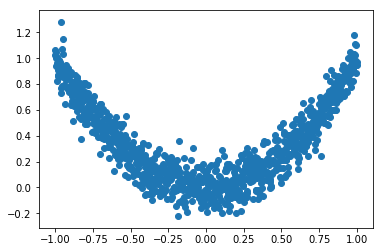

In [6]:
# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [7]:
# put dataset into torch dataset
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [8]:
# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20) # hidden layer
        self.predict = torch.nn.Linear(20, 1) # output layer
    
    def forward(self, x):
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x) # linear output
        return x

In [9]:
# different optimizers
net_dict = {}
opt_dict = {}
net_SGD = Net()
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
net_dict['SGD'] = net_SGD
opt_dict['SGD'] = opt_SGD

net_Momentum = Net()
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
net_dict['Momentum'] = net_Momentum
opt_dict['Momentum'] = opt_Momentum

net_RMSprop = Net()
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
net_dict['RMSprop'] = net_RMSprop
opt_dict['RMSprop'] = opt_RMSprop

net_Adam = Net()
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
net_dict['Adam'] = net_Adam
opt_dict['Adam'] = opt_Adam


In [10]:
# choose optimizer
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
nets = [net_dict[i] for i in labels]
optimizers = [opt_dict[i] for i in labels]

loss_func = torch.nn.MSELoss()
losses_his = [[] for i in range(len(labels))] # record loss

In [11]:
# training
for epoch in range(EPOCH):
    print(f'Epoch: {epoch}')
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x) # get output for every net
            loss = loss_func(output, b_y) # compute loss for every net
            opt.zero_grad() # clear gradients for net train
            loss.backward() # backpropagation, compute gradients
            opt.step() # apply gradients
            l_his.append(loss.data[0]) # loss recorder

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


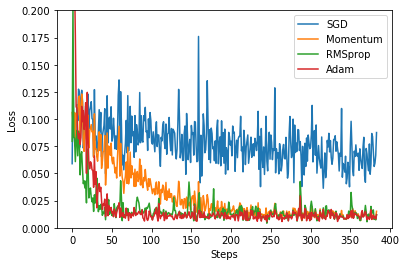

In [12]:
# plotting
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()